# SuperReso

### Super Resolution without stupid ML

In [40]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Load in blurry sample image as well as target image
target_raspberry = cv2.imread('raspberry.jpg')
sample_raspberry = cv2.blur(target_raspberry,(15,15)) # For now, we will use the blurred raspberry image as our sample

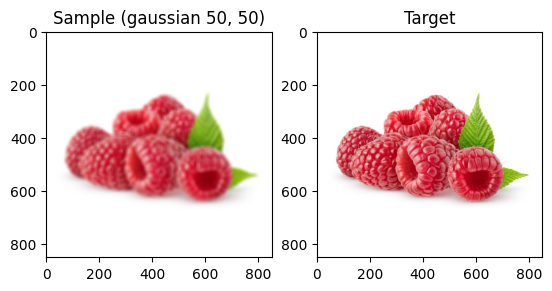

In [58]:
f, ax = plt.subplots(1,2)
ax[0].imshow(cv2.cvtColor(sample_raspberry, cv2.COLOR_BGR2RGB))
ax[0].title.set_text("Sample (gaussian 50, 50)")
ax[1].imshow(cv2.cvtColor(target_raspberry, cv2.COLOR_BGR2RGB))
ax[1].title.set_text("Target")

plt.show()

(850, 850, 3)
(850, 850, 3)


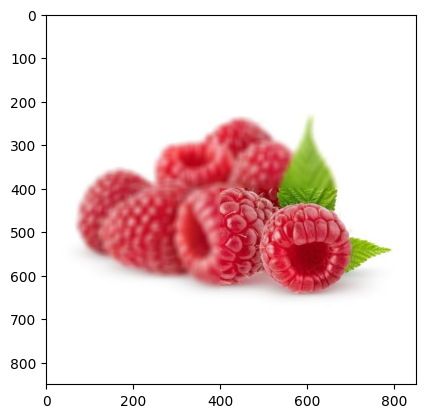

In [76]:
# Then parse through each 32 x 32 pixel patch
print(sample_raspberry.shape)
width, height, _ = sample_raspberry.shape
output_image = sample_raspberry.copy()
PATCH_SIZE = 64

for i in range(400, width-PATCH_SIZE, PATCH_SIZE):
    for j in range(400, height-PATCH_SIZE, PATCH_SIZE):
        patch = sample_raspberry[i:i+PATCH_SIZE, j:j+PATCH_SIZE, :]
#         plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
#         plt.show()
        # For each patch, look for nearest match with the target image
        res = cv2.matchTemplate(target_raspberry, patch, cv2.TM_SQDIFF_NORMED)
#         plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), cmap = 'gray')
#         plt.show()
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
#         print("Results:", min_val, max_val, min_loc, max_loc)

        # Then replace that patch with the nearest match
        output_image[i:i+PATCH_SIZE, j:j+PATCH_SIZE, :] = target_raspberry[min_loc[1]:min_loc[1]+PATCH_SIZE, min_loc[0]:min_loc[0]+PATCH_SIZE, :]
#         break
#     break

# Display output image
print(output_image.shape)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))